In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Settings:
pd.set_option('display.width', 190)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('max_colwidth', 200)
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('default')
np.set_printoptions(threshold = 30, edgeitems = 30, precision = 2, suppress = False)

In [3]:
df = pd.read_csv("../original_data/BCI-values.csv")
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df = df.set_index("Date")
# log transformation
df.BCI = df.BCI.apply(lambda x: np.log(x))
df.BCIg = df.BCIg.apply(lambda x: np.log(x + abs(min(df.BCIg)) + 0.1)) # Because there are values that are negative, we transform all values just a little bit positive to be able to make a logarithmic transformation.
df.BCIp = df.BCIp.apply(lambda x: np.log(x + abs(min(df.BCIp)) + 0.1))

target = pd.read_csv("../original_data/USRECD.csv")
target = target.rename({"DATE": "Date"}, axis=1)
target.Date = pd.to_datetime(target.Date)
df = pd.merge(df, target, on="Date")
df.head()


,Date,BCI,BCIp,BCIg,USRECD
0,1967-02-09,4.6052,6.5870,3.4751,0
1,1967-02-16,4.6052,6.5863,3.4751,0
2,1967-02-23,4.6012,6.5774,3.4751,0
3,1967-03-02,4.6032,6.5820,3.4751,0
4,1967-03-09,4.6042,6.5852,3.4751,0


In [4]:
ie = pd.read_csv("../original_data/Yale IE.csv")
# drop "garbage"
ie = ie.drop(index=[0, 1, 2, 1812])
ie = ie.rename({"Unnamed: 0": "Date", "Unnamed: 1": "SP"}, axis=1)
ie.SP = pd.to_numeric(ie.SP)
# logorithm
ie.SP = ie.SP.apply(lambda x: np.log(x))
ie = ie.reset_index(drop=True)

# data cleaning
def cleaner(x):
    x = str(x)
    if x.endswith('.1'):
        return x.split('.')[0] + '.10'
    else:
        return x

ie.Date = ie.Date.apply(cleaner, convert_dtype=False)
ie.Date = pd.to_datetime(ie.Date)
# change to the correct time
ie.Date = ie.Date + pd.DateOffset(months=1, days=-1)
ie.head()

,Date,SP,Unnamed: 2,Unnamed: 3,Consumer,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Real,Unnamed: 10,Real.1,Earnings,Unnamed: 13,Earnings.1,Unnamed: 15,Unnamed: 16,Monthly,Real.2,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1871-01-31,1.4907,0.26,0.40,12.46,1871.04,5.32,97.25,5.69,97.25,8.76,8.76,NaN,NaN,NaN,NaN,NaN,1.00,1.00,13.06%,9.25%,3.81%,NaN,NaN,NaN,NaN
1,1871-02-28,1.5041,0.26,0.40,12.84,1871.13,5.32,95.64,5.53,96.10,8.50,8.54,NaN,NaN,NaN,NaN,NaN,1.00,0.97,13.09%,9.46%,3.62%,NaN,NaN,NaN,NaN
2,1871-03-31,1.5282,0.26,0.40,13.03,1871.21,5.33,96.55,5.45,97.47,8.38,8.46,NaN,NaN,NaN,NaN,NaN,1.00,0.96,13.10%,9.62%,3.48%,NaN,NaN,NaN,NaN
3,1871-04-30,1.5560,0.26,0.40,12.56,1871.29,5.33,103.03,5.65,104.49,8.69,8.82,NaN,NaN,NaN,NaN,NaN,1.00,1.00,12.21%,9.10%,3.11%,NaN,NaN,NaN,NaN
4,1871-05-31,1.5810,0.26,0.40,12.27,1871.37,5.33,108.10,5.78,110.12,8.90,9.06,NaN,NaN,NaN,NaN,NaN,1.00,1.03,12.26%,8.95%,3.31%,NaN,NaN,NaN,NaN


In [5]:
# Merge IE_SP into df
df["IE_SP"] = df.Date.apply(lambda x: ie[ie.Date <= x].iloc[-1]['SP'])
df.head()

,Date,BCI,BCIp,BCIg,USRECD,IE_SP
0,1967-02-09,4.6052,6.5870,3.4751,0,4.4362
1,1967-02-16,4.6052,6.5863,3.4751,0,4.4362
2,1967-02-23,4.6012,6.5774,3.4751,0,4.4362
3,1967-03-02,4.6032,6.5820,3.4751,0,4.4700
4,1967-03-09,4.6042,6.5852,3.4751,0,4.4700


In [6]:
# difference transformation
# df = df.diff()
# df = df.drop(index='1967-02-09')

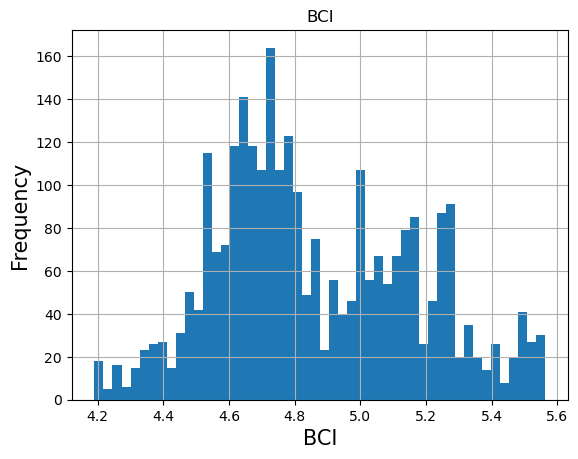

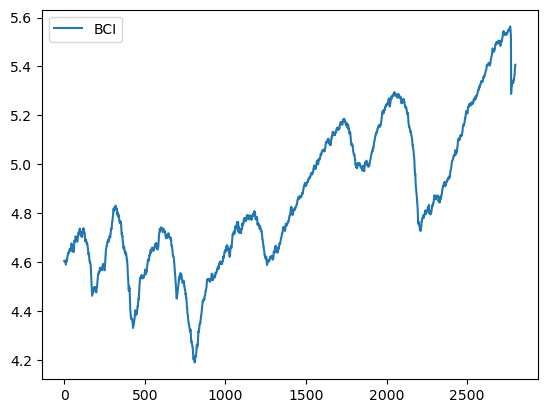

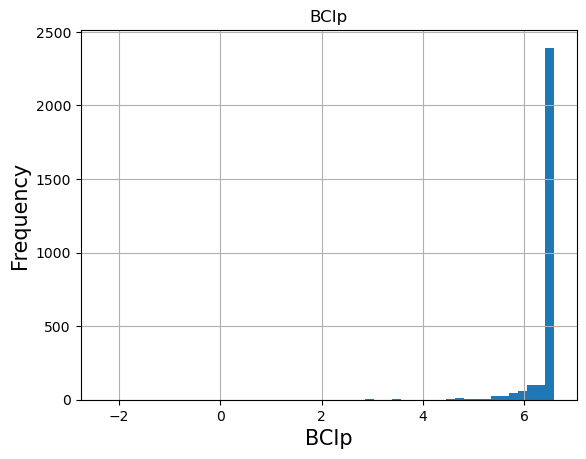

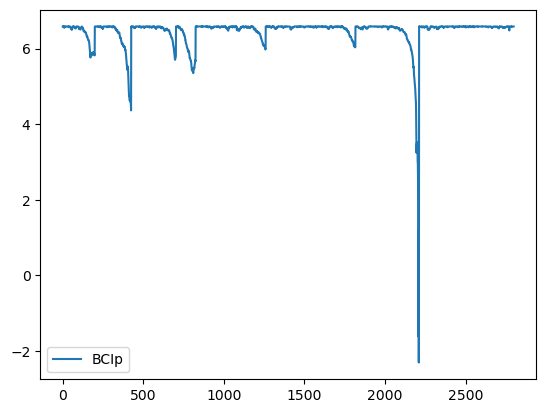

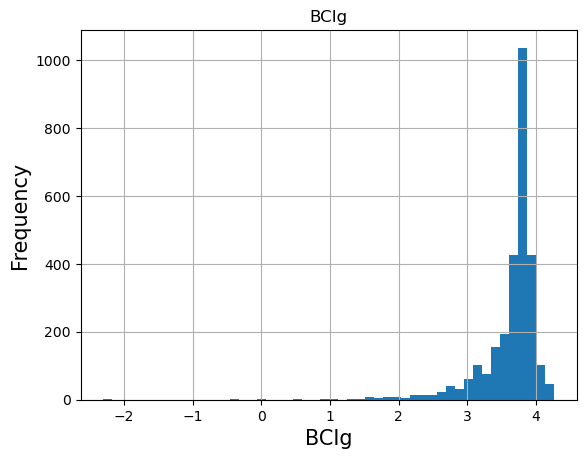

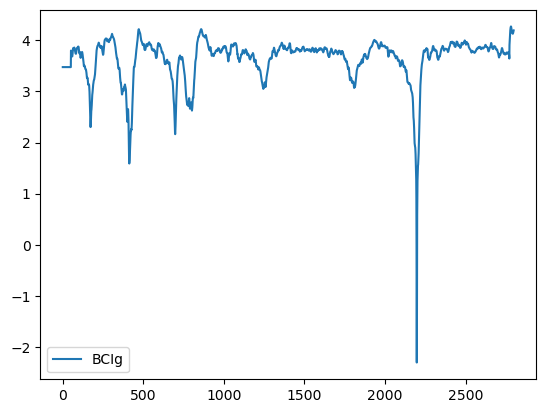

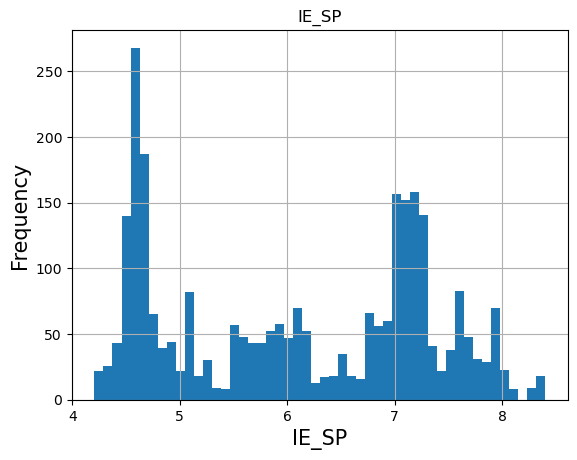

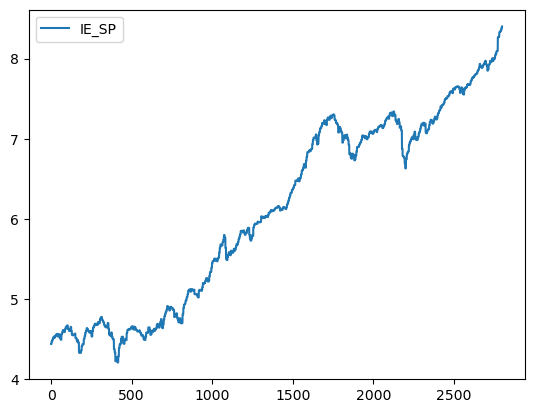

In [7]:
# Histograms of features
features = ['BCI', 'BCIp', 'BCIg', 'IE_SP']

def plot():
    for feature in features:
        df.hist(column = feature, bins = 50)
        plt.xlabel(feature,fontsize=15)
        plt.ylabel("Frequency",fontsize=15)
        plt.show()
        df.plot(y=feature)

plot()

In [8]:
df.to_csv("../merged_data/features_USRECD.csv")